In [1]:
import pandas as pd

# Load the cleaned dataset
full_data = pd.read_csv('cleaned_full_data.csv')

# Group by state and category, then count the number of orders
category_by_state = full_data.groupby(['customer_state', 'product_category_name_english'])['order_id'].count().reset_index()

# Rename columns for clarity
category_by_state.columns = ['customer_state', 'product_category_name_english', 'purchase_count']

# Sort values to find the most popular categories
most_popular_categories = category_by_state.sort_values(['customer_state', 'purchase_count'], ascending=[True, False])

# Display the top categories for each state
for state in most_popular_categories['customer_state'].unique():
    print(f"Most popular categories in {state}:")
    top_categories = most_popular_categories[most_popular_categories['customer_state'] == state]
    print(top_categories.head(5))  # Change this number to display more categories if needed
    print("\n")


Most popular categories in AC:
   customer_state product_category_name_english  purchase_count
12             AC               furniture_decor              12
6              AC         computers_accessories               9
22             AC                sports_leisure               9
15             AC                 health_beauty               7
24             AC                     telephony               5


Most popular categories in AL:
   customer_state product_category_name_english  purchase_count
50             AL                 health_beauty              63
35             AL         computers_accessories              41
68             AL                 watches_gifts              36
47             AL               furniture_decor              34
64             AL                sports_leisure              33


Most popular categories in AM:
    customer_state product_category_name_english  purchase_count
88              AM                 health_beauty              20
77   

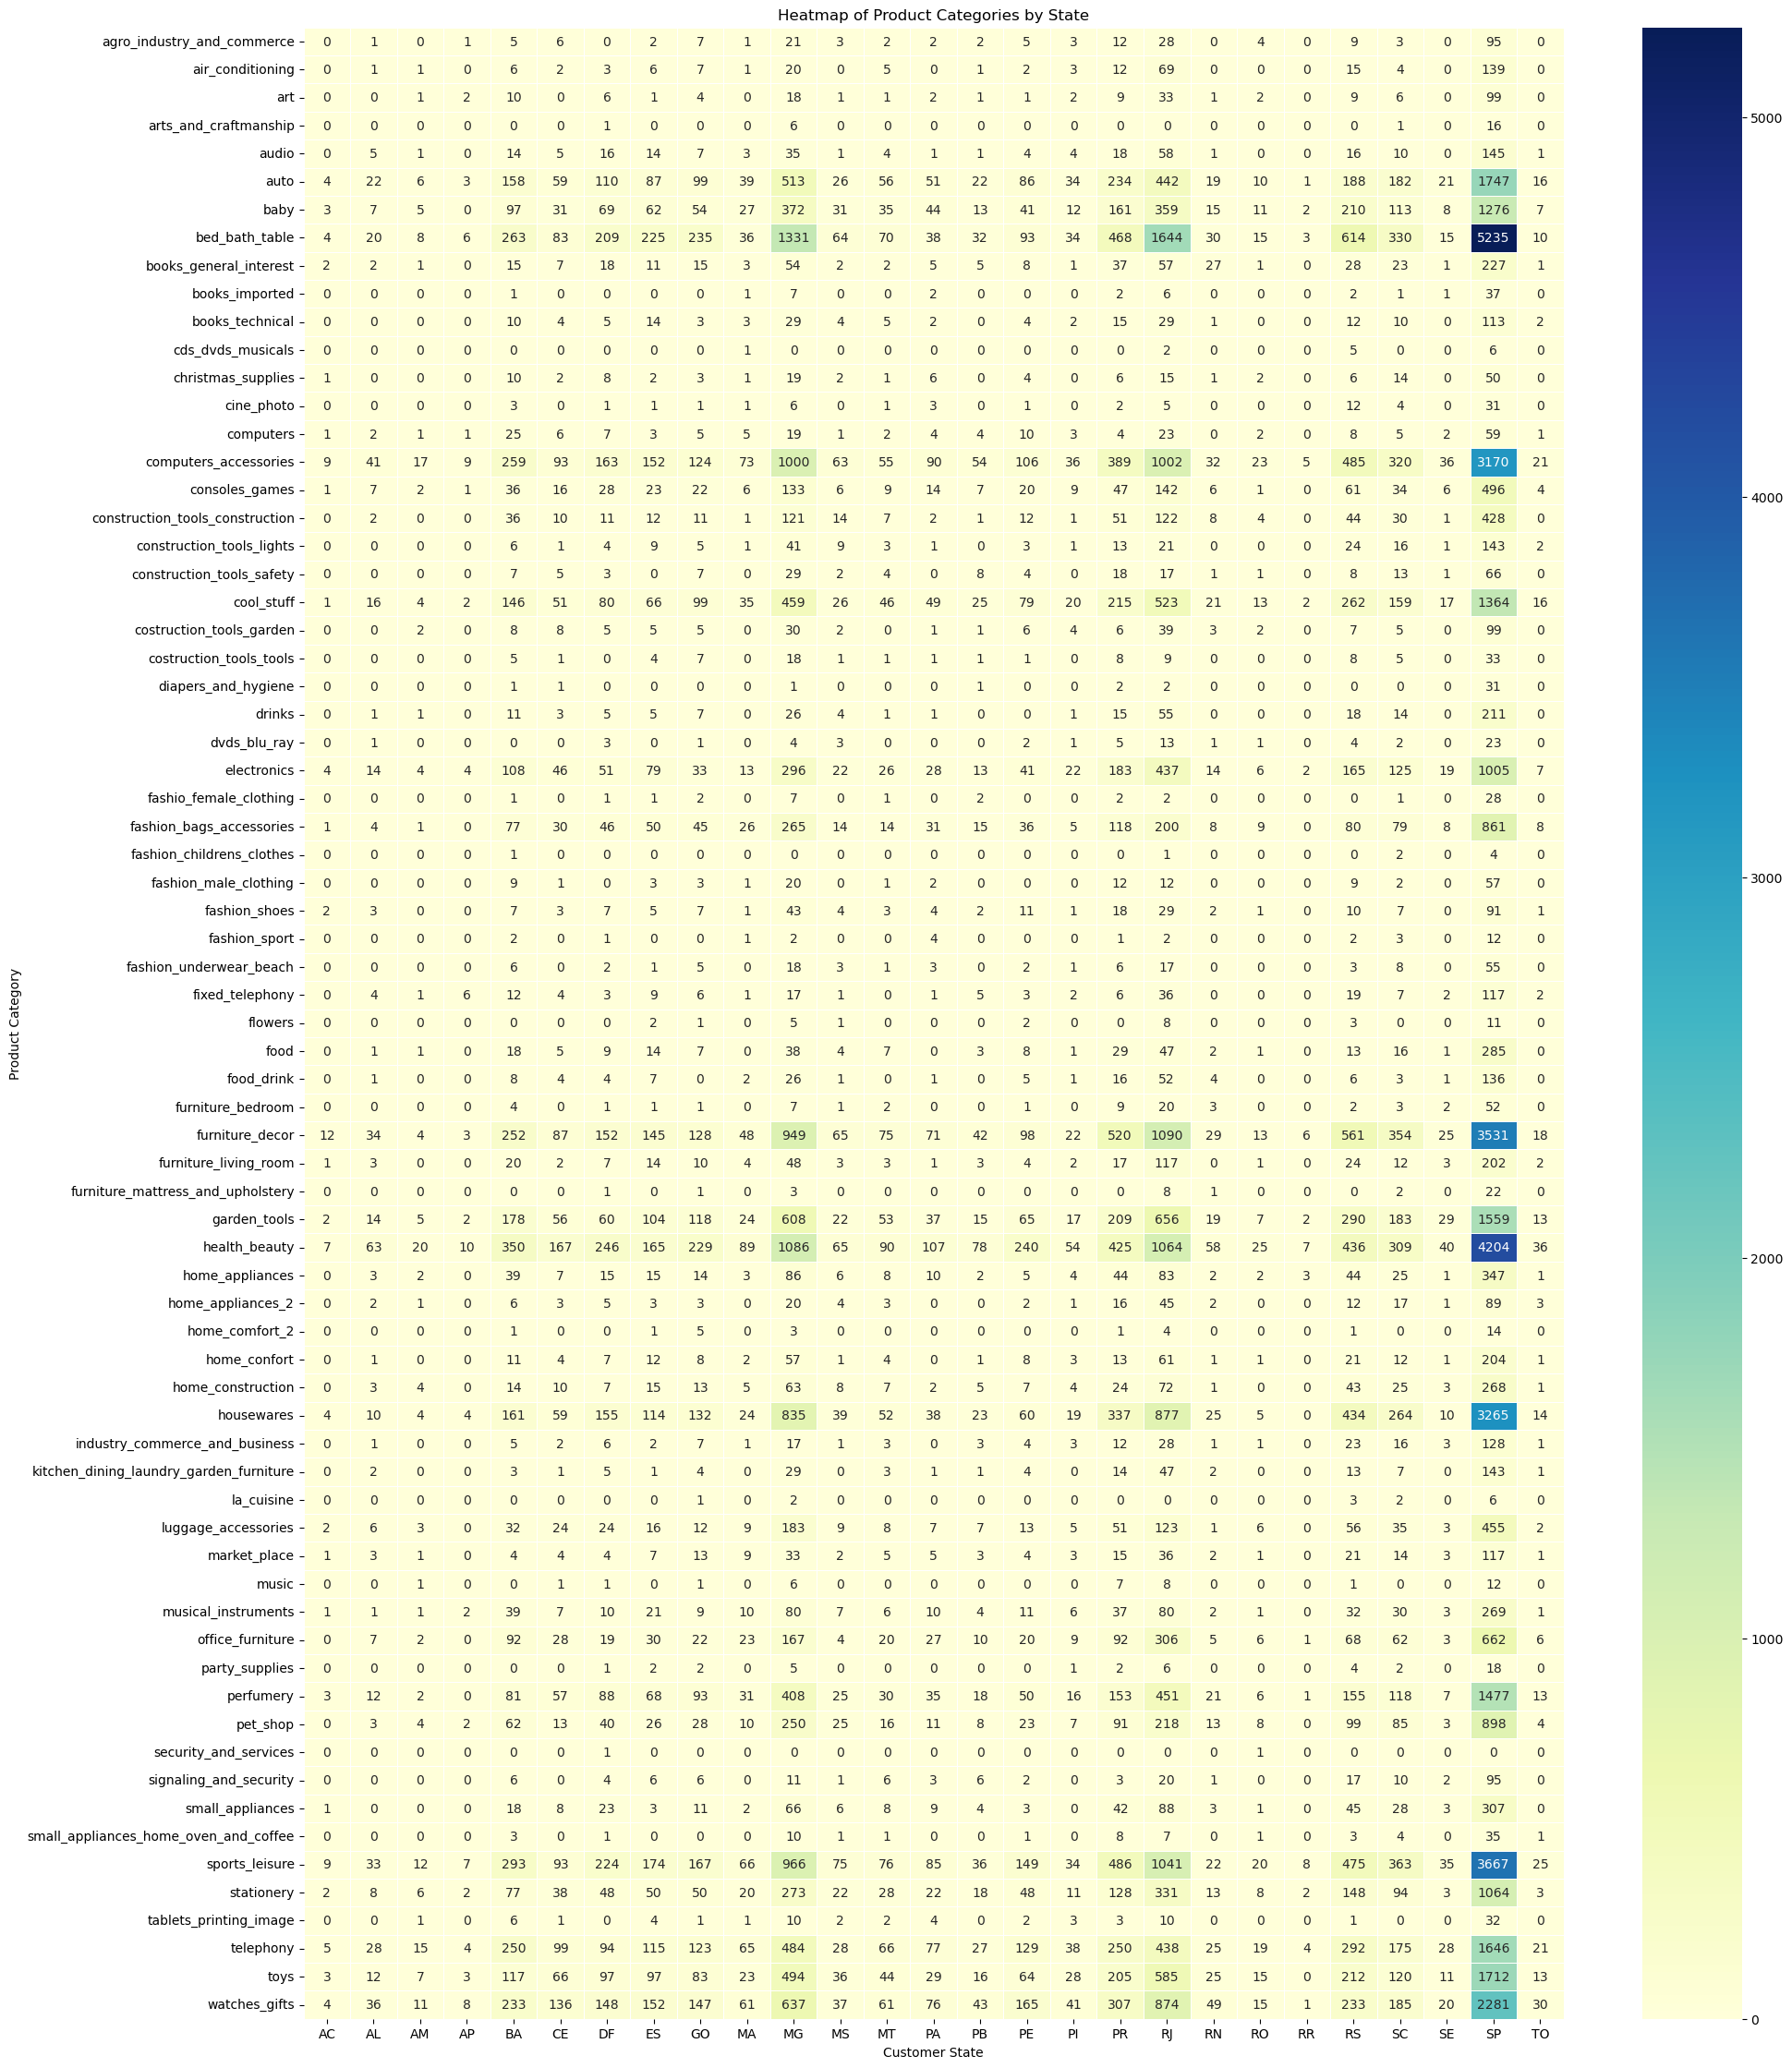

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data for heatmap
pivot_table = category_by_state.pivot(index='product_category_name_english', columns='customer_state', values='purchase_count').fillna(0)

# Create a heatmap
plt.figure(figsize=(22, 28))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Product Categories by State')
plt.xlabel('Customer State')
plt.ylabel('Product Category')
plt.show()


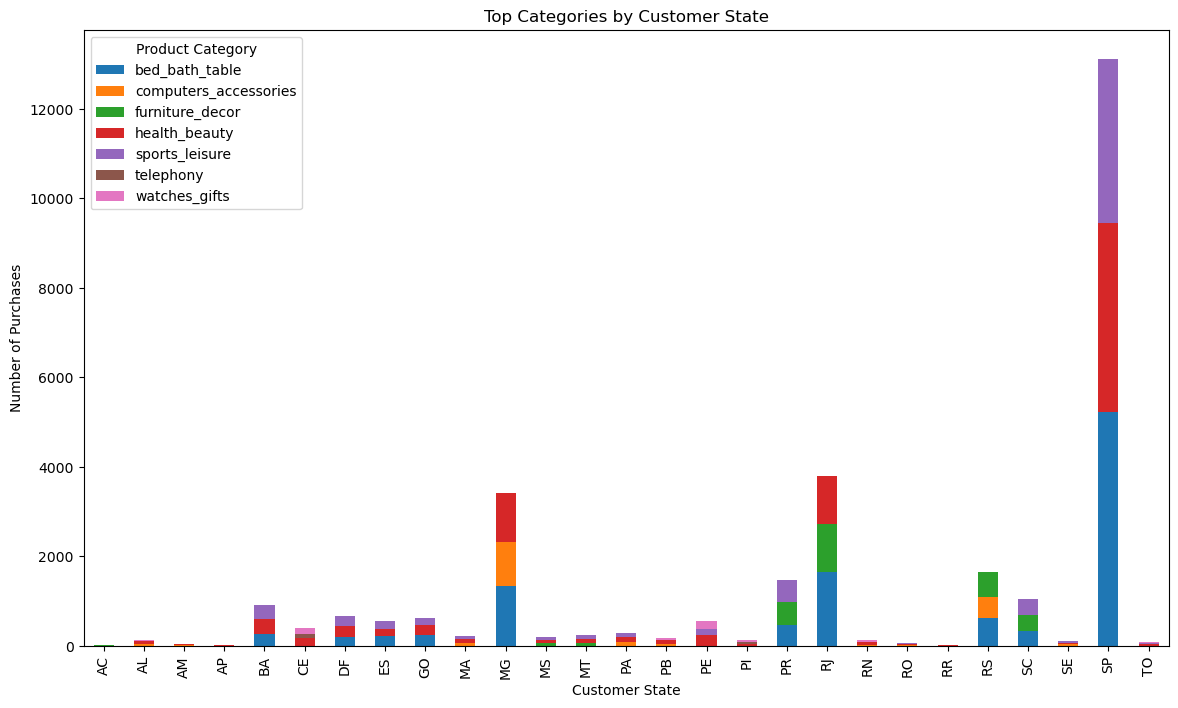

In [9]:
# Get the top N categories for each state
top_n = 3
top_categories_per_state = (category_by_state
                            .sort_values('purchase_count', ascending=False)
                            .groupby('customer_state')
                            .head(top_n))

# Create a pivot table for better visualization
pivot_table = top_categories_per_state.pivot(index='customer_state', columns='product_category_name_english', values='purchase_count').fillna(0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top Categories by Customer State')
plt.ylabel('Number of Purchases')
plt.xlabel('Customer State')
plt.legend(title='Product Category')
plt.show()


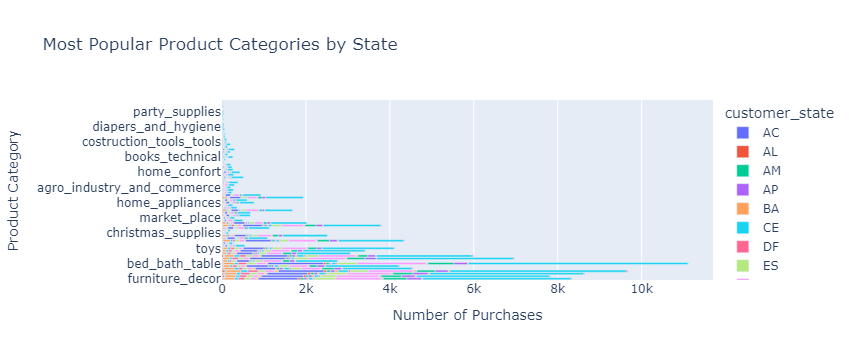

In [11]:
import plotly.express as px

# Create a bar chart using Plotly
fig = px.bar(most_popular_categories, 
             x='purchase_count', 
             y='product_category_name_english', 
             color='customer_state',
             title='Most Popular Product Categories by State',
             labels={'purchase_count': 'Number of Purchases', 'product_category_name_english': 'Product Category'},
             orientation='h')

fig.show()


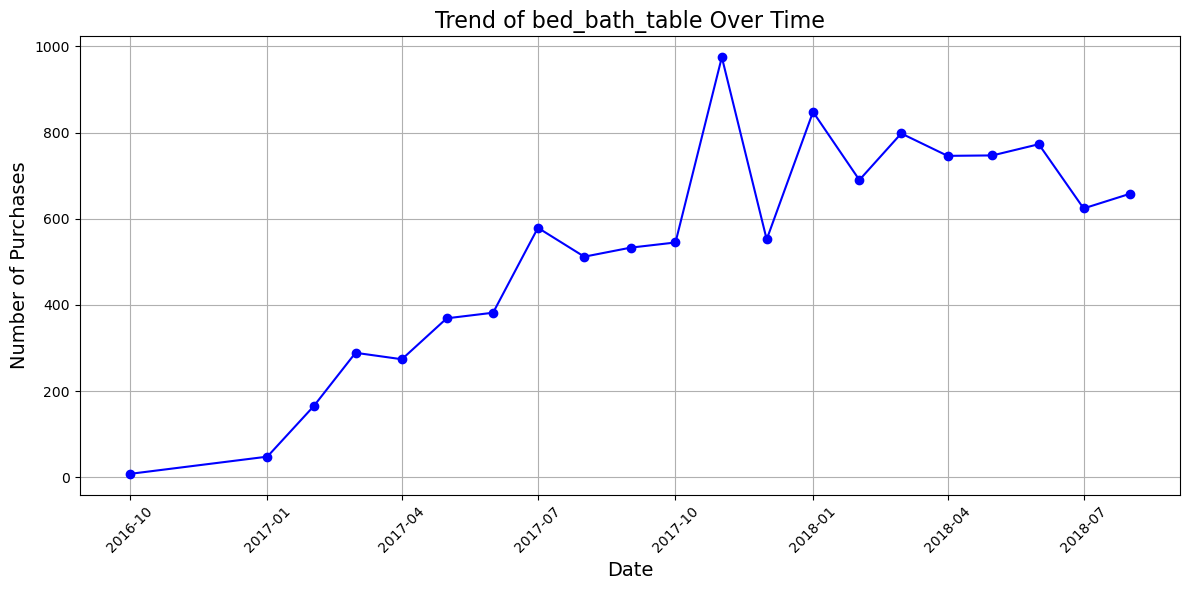

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
full_data = pd.read_csv('cleaned_full_data.csv')

# Group by month and category
monthly_trends = full_data.groupby(['order_year', 'order_month', 'product_category_name_english'])['order_id'].count().reset_index()

# Create a date column from year and month
monthly_trends['date'] = pd.to_datetime(monthly_trends['order_year'].astype(str) + '-' + monthly_trends['order_month'].astype(str) + '-01')

# Plotting trends for a specific category
specific_category = 'bed_bath_table'  # Change this to any category
category_trend = monthly_trends[monthly_trends['product_category_name_english'] == specific_category]

plt.figure(figsize=(12, 6))
plt.plot(category_trend['date'], category_trend['order_id'], marker='o', linestyle='-', color='b')
plt.title(f'Trend of {specific_category} Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
